In [1]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla
import matplotlib.pyplot as plt

In [ ]:
pts = np.array([[2, 4], [3, 2], [5, 1], [6, 0]])
# Reformat looks like:
# [[2, 4], 
#  [3, 2], 
#  [5, 1], 
#  [6, 0]]

t_vector = pts[:,0]
y_vector = pts[:,1]
# y being value.
# Note that we are solving for:
# y = A x
# 
# So given M is max, A is constant, k is constant:
# y = M / (1 + A e^(-k t))
# OR
# y = M / (1 + e^(-k(x - x0)))
# Where t0 is infliction point (time where halfway point is at.) (Is there an A?)
# OR
# y'(t) = k y (M - y)
# (This is a dynamical system)

# Ended up having 1s second
A_line_transpose = np.array([t_vector , t_line** 0])
A_line = A_line_transpose.T

# A.T y = A.T A x
# for best solution of x
# x = (A.T A)^-1 @ (A.T y)

### Using scipy to solve this:


In [15]:
from scipy.optimize import curve_fit
import pandas as pd

# Define the Logistic function
def func(t, M, A, k):
    return M / (1 + A * np.e**(-k * t))

# Check this to read comma separated values
M3_data = pd.read_csv("M3 Seattle Data.csv", dtype={'year': np.int64})
# print out first 5 rows of the data
print(M3_data.head())

# Get the data
t_data = M3_data['Year'].values
housing_data = M3_data['Total housing units'].values



   Year  Total housing units
0  2010               302465
1  2011               304164
2  2012               306694
3  2013               309205
4  2014               311286
[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [17]:
popt, pcov = curve_fit(func, t_data, housing_data)

print(popt)

[3.31450615e+05 1.00000000e+00 1.00000000e+00]


C:\Users\lin3232\AppData\Local\Temp\ipykernel_7436\3600390044.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, t_data, housing_data)


In [25]:
# Creating list to extrapolate to further values:
t_futures = [2030,2100,10]
print(t_futures)

[2030, 2100, 10]


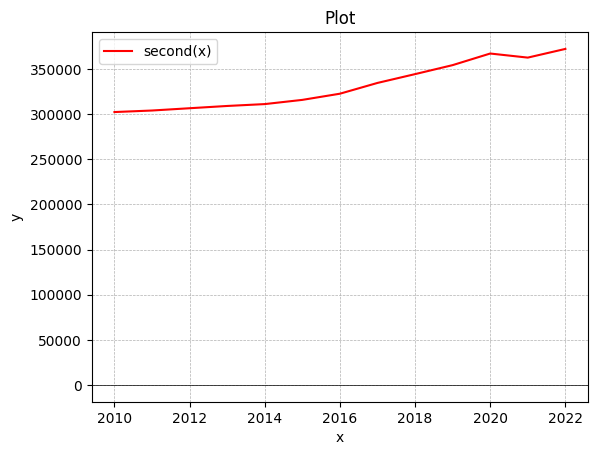

In [23]:
plt.plot(t_data, housing_data, label='second(x)', color='red')

plt.axhline(0, color='black', linewidth=0.5)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()